### Boosting

* XGboost Introduction
* XGboost Prediction
* Compare with Logistic Regression
* Function to Read Data 
* Application on Titaic Data

### Introduction

In [43]:
# import xgboost as xgb
# import xgboost
import sys
import os

# add the xgboost path 
sys.path.append("/Users/Qianqian/xgboost/python-package") 
import xgboost as xgb
#if nb_dir not in sys.path:
#    sys.path.append(nb_dir)
# print(sys.path)
import numpy as np


In [44]:
# define a customized first and second order derivatives
def log_reg(y_hat, y):
    p = 1.0 / (1.0 + np.exp(-y_hat))
    g = p - y.get_label()
    h = p * (1.0 - p)
    return g, h

# customized error rate 
def error_rate(y_hat, y):
    return 'error', float(sum(y.get_label() != (y_hat > 0.5))) / len(y_hat)

In [46]:
data_train = xgb.DMatrix('Data-and-Output/12.agaricus_train.txt')
data_test = xgb.DMatrix('Data-and-Output/12.agaricus_test.txt')


# Parameters 
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logitraw'} # logitraw
# param = {'max_depth': 3, 'eta': 0.3, 'silent': 1, 'objective': 'reg:logistic'}
watchlist = [(data_test, 'eval'), (data_train, 'train')]
n_round = 3

# use personalized function  log_reg and error_rate
# bst = xgb.train(param, data_train, num_boost_round=n_round, evals=watchlist)
bst = xgb.train(param, data_train, num_boost_round=n_round, evals=watchlist, obj=log_reg, feval=error_rate)
# help(xgb.train)

[0]	eval-auc:0.960373	train-auc:0.958228	eval-error:0.042831	train-error:0.046522
[1]	eval-auc:0.97993	train-auc:0.981413	eval-error:0.021726	train-error:0.022263
[2]	eval-auc:0.998518	train-auc:0.99707	eval-error:0.018001	train-error:0.0152


In [47]:
 # 计算错误率
y_hat = bst.predict(data_test)
y = data_test.get_label()
print (y_hat)
print (y)


[-1.70712996  1.70548773 -1.70712996 ...,  3.15561986 -3.70064616
  3.15561986]
[ 0.  1.  0. ...,  1.  0.  1.]


In [48]:
# find the error rate 
error = sum(y != (y_hat > 0))
error_rate = float(error) / len(y_hat)
print ('Sample Number：\t', len(y_hat))
print ('Incorrect Number：\t%3d' % error)
print ('Error Rate：\t%.5f%%' % (100*error_rate))


Sample Number：	 1611
Incorrect Number：	 10
Error Rate：	0.62073%


### Prediction on Iris Data

In [49]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split   # cross_validation


def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

classes = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}

In [51]:
path = 'Data-and-Output/8.iris.data'  # data path
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: lambda x: classes[x]})
# data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})

# split array into multiple sub-arrays
x, y = np.split(data, (4,), axis = 1) # divide the data into 4 equal arrays along the axis 
# print(x)
# print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=50)

data_train = xgb.DMatrix(x_train, label=y_train)
data_test = xgb.DMatrix(x_test, label=y_test)
watch_list = [(data_test, 'eval'), (data_train, 'train')]
param = {'max_depth': 3, 'eta': 1, 'silent': 1, 'objective': 'multi:softmax', 'num_class': 3}

bst = xgb.train(param, data_train, num_boost_round=6, evals=watch_list)
y_hat = bst.predict(data_test)
result = y_test.reshape(1, -1) == y_hat
print ('Correct Rate:\t', float(np.sum(result)) / len(y_hat))
print ('END...\n')

# help(np.split)

[0]	eval-merror:0.02	train-merror:0.02
[1]	eval-merror:0.02	train-merror:0.02
[2]	eval-merror:0.04	train-merror:0.01
[3]	eval-merror:0.04	train-merror:0.01
[4]	eval-merror:0.04	train-merror:0
[5]	eval-merror:0.04	train-merror:0
Correct Rate:	 0.96
END...



### Comparison with Logistic Regression


In [53]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split   # cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [66]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print ('Accuracy \n ', acc, "\n")
    print (tip + 'Correct Rate：\t', float(acc.sum()) / a.size)
# help(ravel)

In [67]:
data = np.loadtxt('Data-and-Output/12.wine.data', dtype=float, delimiter=',')
y, x = np.split(data, (1,), axis=1)
# x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)


# Logistic Regression
lr = LogisticRegression(penalty='l2') # penalty : default: 'l2' : 
                                     # Used to specify the norm used in the penalization. 
lr.fit(x_train, y_train.ravel())
y_hat = lr.predict(x_test)
show_accuracy(y_hat, y_test, 'Logistic Regression')
# help(LogisticRegression)

Accuracy 
  [ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True] 

Logistic RegressionCorrect Rate：	 0.9438202247191011


In [69]:

# XGBoost 
y_train[y_train == 3] = 0  # class starts from 0 
y_test[y_test == 3] = 0
data_train = xgb.DMatrix(x_train, label=y_train)
data_test = xgb.DMatrix(x_test, label=y_test)
watch_list = [(data_test, 'eval'), (data_train, 'train')]
param = {'max_depth': 3, 'eta': 1, 'silent': 0, 'objective': 'multi:softmax', 'num_class': 3}
bst = xgb.train(param, data_train, num_boost_round=4, evals=watch_list)
y_hat = bst.predict(data_test)
show_accuracy(y_hat, y_test, 'XGBoost ')

[0]	eval-merror:0.011236	train-merror:0
[1]	eval-merror:0	train-merror:0
[2]	eval-merror:0.011236	train-merror:0
[3]	eval-merror:0.011236	train-merror:0
Accuracy 
  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True] 

XGBoost Correct Rate：	 0.9887640449438202


### function to ead data 

In [72]:
import xgboost as xgb
import numpy as np
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# function
def read_data(path):
    y = []
    row = []
    col = []
    values = []
    r = 0       # first line , increase as reading more lines 
    for d in open(path):
        d = d.strip().split()      # split by blank 
        y.append(int(d[0]))  # the first value is y 
        d = d[1:]  # 
        for c in d:
            key, value = c.split(':')  # sparse matrix data format 52:1
            row.append(r)
            col.append(int(key))
            values.append(float(value))
        r += 1
    x = scipy.sparse.csr_matrix((values, (row, col))).toarray()
    y = np.array(y)
    return x, y

In [75]:
# load data 
x, y = read_data('Data-and-Output/12.agaricus_train.txt')
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

# Logistic 
lr = LogisticRegression(penalty='l2')
lr.fit(x_train, y_train.ravel())
y_hat = lr.predict(x_test)
show_accuracy(y_hat, y_test, 'Logistic Regression ')

# XGBoost
y_train[y_train == 3] = 0
y_test[y_test == 3] = 0
data_train = xgb.DMatrix(x_train, label=y_train)
data_test = xgb.DMatrix(x_test, label=y_test)
watch_list = [(data_test, 'eval'), (data_train, 'train')]
param = {'max_depth': 3, 'eta': 1, 'silent': 0, 'objective': 'multi:softmax', 'num_class': 3}
bst = xgb.train(param, data_train, num_boost_round=4, evals=watch_list)
y_hat = bst.predict(data_test)
show_accuracy(y_hat, y_test, 'XGBoost ')


Accuracy 
  [ True  True  True ...,  True  True  True] 

Logistic Regression Correct Rate：	 1.0
[0]	eval-merror:0.035687	train-merror:0.040696
[1]	eval-merror:0.007291	train-merror:0.009982


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[2]	eval-merror:0.000767	train-merror:0.000512
[3]	eval-merror:0.000767	train-merror:0.000512
Accuracy 
  [ True  True  True ...,  True  True  True] 

XGBoost Correct Rate：	 0.9992325402916347


### Application on Titanic Data

In [85]:
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import csv

In [89]:
def load_data(file_name, is_train):
    data = pd.read_csv(file_name)  # file path
    print ('Data description: ', data.describe())

    # gender 
    data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)  # map the 'sex' to 0 - 1

    # impute the missing fare values by the median of the same Pclass
    if len(data.Fare[data.Fare.isnull()]) > 0:
        fare = np.zeros(3)
        # find the median values 
        for f in range(0, 3):
            fare[f] = data[data.Pclass == f + 1]['Fare'].dropna().median()
        # impute the data
        for f in range(0, 3):  # loop 0 to 2
            data.loc[(data.Fare.isnull()) & (data.Pclass == f + 1), 'Fare'] = fare[f]
    
    # Age imputation method 1: 
    # Age imputation: replace the missing ages by the mean 
    # mean_age = data['Age'].dropna().mean()
    # data.loc[(data.Age.isnull()), 'Age'] = mean_age
    
    # Age imputation method 2: use random forest 
    if is_train:
        print ('Random Forest Missing Ages Prediction--start--')
        data_for_age = data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
        age_exist = data_for_age.loc[(data.Age.notnull())]   # no missing age data
        age_null = data_for_age.loc[(data.Age.isnull())]

        x = age_exist.values[:, 1:]
        y = age_exist.values[:, 0]
        rfr = RandomForestRegressor(n_estimators=1000)
        rfr.fit(x, y)
        age_hat = rfr.predict(age_null.values[:, 1:]) # predict the missing age values 

        data.loc[(data.Age.isnull()), 'Age'] = age_hat
        print ('Random Forest Missing Ages Prediction--end--')
    else:
        print ('Random Forest Missing Ages Prediction-Less Features Version--start--')
        data_for_age = data[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
        age_exist = data_for_age.loc[(data.Age.notnull())]  # 
        age_null = data_for_age.loc[(data.Age.isnull())]

        x = age_exist.values[:, 1:]
        y = age_exist.values[:, 0]
        rfr = RandomForestRegressor(n_estimators=1000)
        rfr.fit(x, y)
        age_hat = rfr.predict(age_null.values[:, 1:])

        data.loc[(data.Age.isnull()), 'Age'] = age_hat
        print ('Random Forest Missing Ages Prediction-Less Features Version--end--')

    # start city
    data.loc[(data.Embarked.isnull()), 'Embarked'] = 'S'  
    # data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, 'U': 0}).astype(int)
    
    embarked_data = pd.get_dummies(data.Embarked)
    # embarked_data = embarked_data.rename(columns={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown', 'U': 'UnknownCity'})
    embarked_data = embarked_data.rename(columns=lambda x: 'Embarked_' + str(x))
    data = pd.concat([data, embarked_data], axis=1)
    print(data.describe())
    data.to_csv('Data-and-Output/New_Data.csv')

    x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
    # x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    y = None
    if 'Survived' in data:
        y = data['Survived']

    x = np.array(x)
    y = np.array(y)

    x = np.tile(x, (5, 1)) # Construct an array by repeating A the number of times given by reps.
    y = np.tile(y, (5, ))
    if is_train:
        return x, y
    return x, data['PassengerId']
# help(np.tile)

In [90]:

# c: the fitted model; 
def write_result(c, c_type):
    file_name = 'Data-and-Output/12.Titanic.test.csv'
    x, passenger_id = load_data(file_name, False)

    if type == 3:
        x = xgb.DMatrix(x)
    y = c.predict(x)
    y[y > 0.5] = 1
    y[~(y > 0.5)] = 0

    predictions_file = open("Prediction_%d.csv" % c_type, "wb")
    open_file_object = csv.writer(predictions_file)
    open_file_object.writerow(["PassengerId", "Survived"])
    open_file_object.writerows(zip(passenger_id, y))
    predictions_file.close()

In [91]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    acc_rate = 100 * float(acc.sum()) / a.size
    return acc_rate

# load data
x, y = load_data('Data-and-Output/12.Titanic.train.csv', True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

# logistic regression
lr = LogisticRegression(penalty='l2')
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
lr_rate = show_accuracy(y_hat, y_test, 'Logistic Regression ')
# write_result(lr, 1)

# Random forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
rfc_rate = show_accuracy(y_hat, y_test, 'Random Forest ')
# write_result(rfc, 2)

# XGBoost
data_train = xgb.DMatrix(x_train, label=y_train)
data_test = xgb.DMatrix(x_test, label=y_test)
watch_list = [(data_test, 'eval'), (data_train, 'train')]
param = {'max_depth': 3, 'eta': 0.1, 'silent': 1, 'objective': 'binary:logistic'}
             # 'subsample': 1, 'alpha': 0, 'lambda': 0, 'min_child_weight': 1}
bst = xgb.train(param, data_train, num_boost_round=100, evals=watch_list)
y_hat = bst.predict(data_test)
# write_result(bst, 3)
y_hat[y_hat > 0.5] = 1
y_hat[~(y_hat > 0.5)] = 0
xgb_rate = show_accuracy(y_hat, y_test, 'XGBoost ')

print ('Logistic Regression：%.3f%%' % lr_rate)
print ('Random Forest：%.3f%%' % rfc_rate)
print ('XGBoost：%.3f%%' % xgb_rate)


Data description:         PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Random Forest Missing Ages Prediction--start--
Random Forest M

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import csv

def f(x):
    return 0.5*np.exp(-(x+3) **2) + np.exp(-x**2) +  0.5*np.exp(-(x-3) ** 2)

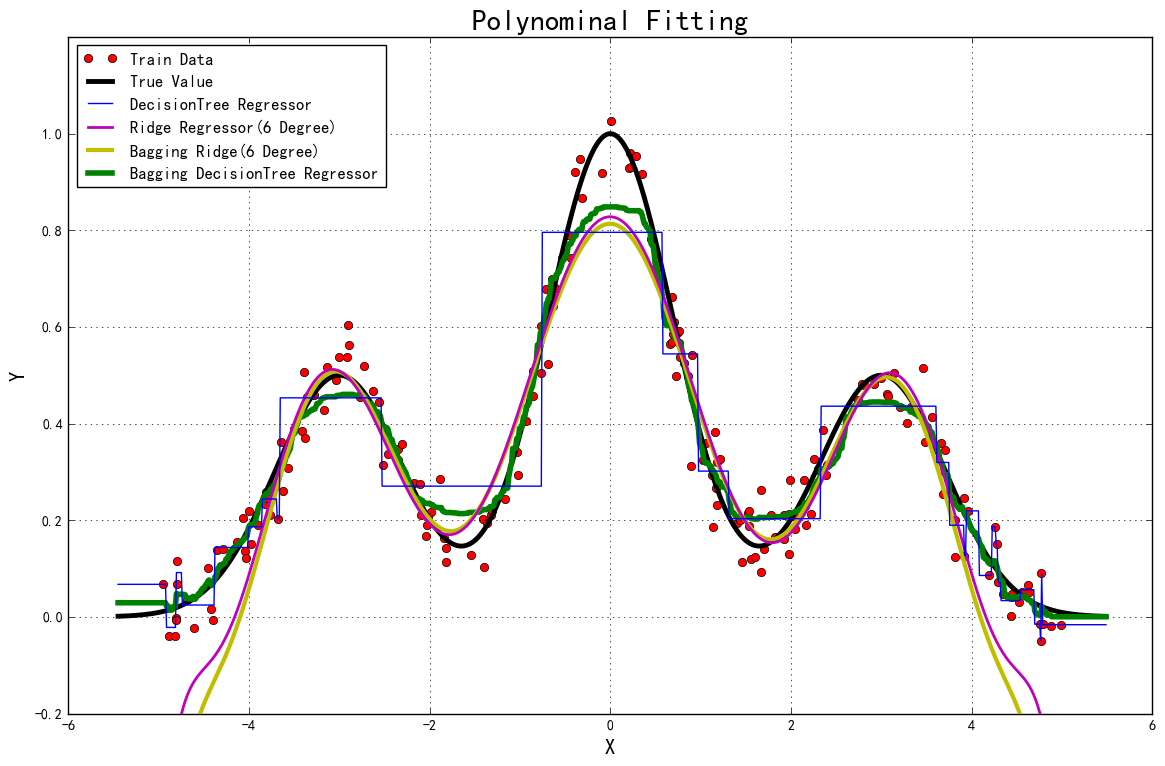

In [97]:

np.random.seed(0)
N = 200
x = np.random.rand(N) * 10 - 5  # [-5,5)
x = np.sort(x)
y = f(x) + 0.05*np.random.randn(N)
x.shape = -1, 1

# regressors 
ridge = RidgeCV(alphas=np.logspace(-3, 2, 10), fit_intercept=False)
ridged = Pipeline([('poly', PolynomialFeatures(degree=10)), ('Ridge', ridge)])
bagging_ridged = BaggingRegressor(ridged, n_estimators=100, max_samples=0.3)
dtr = DecisionTreeRegressor(max_depth=5)

# methods to be iterated
regs = [
    ('DecisionTree Regressor', dtr),
    ('Ridge Regressor(6 Degree)', ridged),
    ('Bagging Ridge(6 Degree)', bagging_ridged),
    ('Bagging DecisionTree Regressor', BaggingRegressor(dtr, n_estimators=100, max_samples=0.3))]
x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8), facecolor='w')
plt.plot(x, y, 'ro', label=u'Train Data')
plt.plot(x_test, f(x_test), color='k', lw=3.5, label=u'True Value')
clrs = 'bmyg'
for i, (name, reg) in enumerate(regs):
    reg.fit(x, y)
    y_test = reg.predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_test.ravel(), color=clrs[i], lw=i+1, label=name, zorder=6-i)
plt.legend(loc='upper left')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title(u'Polynominal Fitting', fontsize=21)
plt.ylim((-0.2, 1.2))
plt.tight_layout(2)
plt.grid(True)
plt.show()
